In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
lr=0.01
n_iters = 1000

In [4]:
def split(X,y):
    print(f'X_shape: ',X.shape)
    print(f'y_shape: ',y.shape)

    # Get number of samples
    num_samples = X.shape[0]

    # Shuffle indices
    indices = np.random.permutation(num_samples)

    # Determine split sizes
    train_size = int(0.7 * num_samples)
    test_size = num_samples - train_size

    # Split indices into train and test sets
    train_indices = indices[:train_size]
    test_indices = indices[train_size:]

    # Split data into train and test sets
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    print(f'X_train_shape: ',X_train.shape)
    print(f'y_train_shape: ',y_train.shape)
    print(f'X_test_shape: ',X_test.shape)
    print(f'y_test_shape: ',y_test.shape)
    return X_train, X_test, y_train, y_test

def phi(X, no_of_samples):
    x1 = X[:,0]
    x2 = X[:,1]
    X_new = np.empty((no_of_samples, 5))
    X_new[:, 0] = x1
    X_new[:, 1] = x2
    X_new[:, 2] = x1**2
    X_new[:, 3] = x2**2
    X_new[:, 4] = x1 * x2
    return X_new

def fit(X, y):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for i in range(n_iters):
        y_pred = np.dot(X, weights) + bias
        dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
        db = (1/n_samples) * np.sum(y_pred-y)
        #print(f"the shape of dw: ",dw.shape)
        #print(f"the shape of weights: ",weights.shape)
        weights = weights - lr * dw
        bias = bias - lr * db
    
    return weights, bias

def predict(X, weights, bias):
    y_pred = np.dot(X, weights) + bias
    return y_pred



### Load the data

In [5]:
# Load data from text file
data = np.loadtxt("regression_data_multiGen_group_6_train.txt", delimiter='\t',  skiprows=1)

# Split data into features (X) and targets (y)
X = data[:, :2]  # Features
y = data[:, 2:]  # Targets

no_of_samples = X.shape[0]
X = phi(X, no_of_samples)

X_train, X_test, y_train, y_test = split(X,y)

X_shape:  (14000, 5)
y_shape:  (14000, 3)
X_train_shape:  (9800, 5)
y_train_shape:  (9800, 3)
X_test_shape:  (4200, 5)
y_test_shape:  (4200, 3)


### Training data plot of Feature4 vs y1

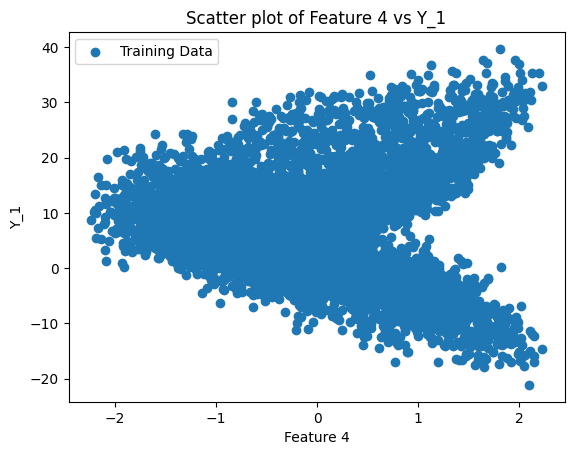

In [6]:
plt.scatter(X_train[:, 4], y_train[:, 0], label='Training Data')
plt.xlabel('Feature 4')
plt.ylabel('Y_1')
plt.title('Scatter plot of Feature 4 vs Y_1')
plt.legend()
plt.show()

### Performance metrics

In [7]:
def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

def mae(y_test, predictions):
    return np.mean(abs(y_test-predictions))

def prearson_corr(y_test, predictions):
    return np.corrcoef(predictions, y_test)[0, 1]

### Line fitting, generating predictions and performance metric values

14.648609810961847
3.078988588221651
0.8943507672042559
y_pred_line shape:  (4200,)
18.986027584901397
3.404409449185562
0.8525619887309999
y_pred_line shape:  (4200,)
18.854228807260675
3.381947842962136
0.8499792667615879
y_pred_line shape:  (4200,)


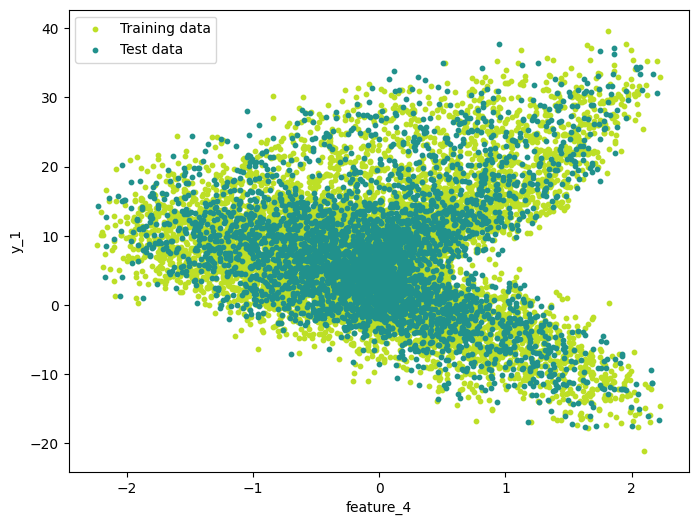

In [8]:
y_pred = np.empty((y_test.shape[0], y_test.shape[1]))
mean_sq_error = []
mean_abs_error = []
pearson_corr_coeff = []

for i in range(3):
    weights, bias = fit(X_train,y_train[:, i])
    predictions = predict(X_test, weights, bias)

    m_se = mse(y_test[:, i], predictions)
    print(m_se)
    mean_sq_error.append(m_se)

    m_ae = mae(y_test[:, i], predictions)
    print(m_ae)
    mean_abs_error.append(m_ae)

    p_coeff = prearson_corr(y_test[:, i], predictions)
    print(p_coeff)
    pearson_corr_coeff.append(p_coeff)

    #y_pred_line = predict(X_test)
    print(f'y_pred_line shape: ',predictions.shape)
    
    y_pred[:,i] = predictions

cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train[:, 4], y_train[:, 0], color=cmap(0.9), s=10, label='Training data')
m2 = plt.scatter(X_test[:, 4], y_test[:, 0], color=cmap(0.5), s=10, label='Test data')
plt.xlabel('feature_4')
plt.ylabel('y_1')
#plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.legend()
plt.show()

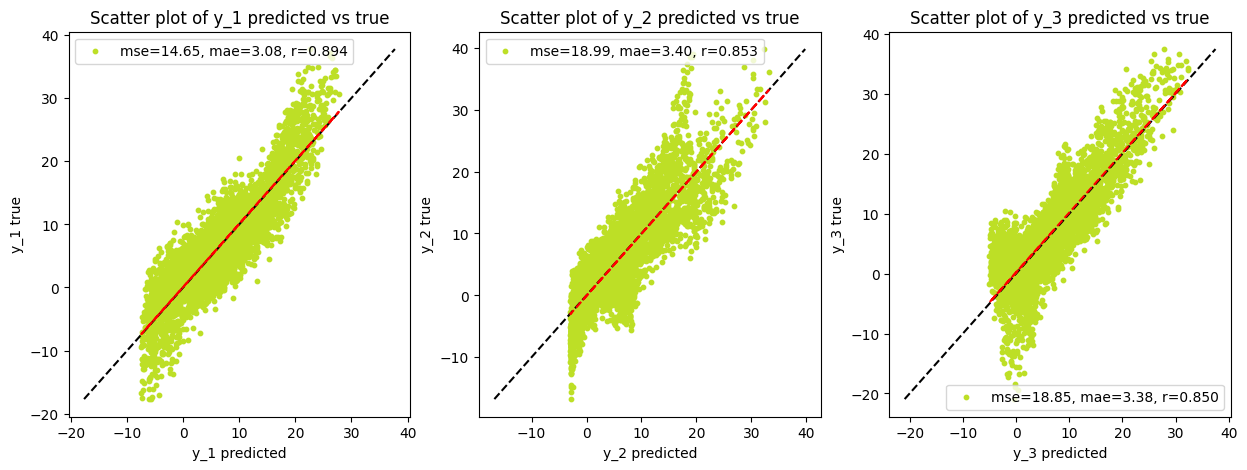

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    axs[i].scatter(y_pred[:,i], y_test[:, i], color=cmap(0.9), s=10, label=f'mse={mean_sq_error[i]:.2f}, mae={mean_abs_error[i]:.2f}, r={pearson_corr_coeff[i]:.3f}')
    axs[i].legend()
    axs[i].set_xlabel(f'y_{i+1} predicted')
    axs[i].set_ylabel(f'y_{i+1} true')
    axs[i].set_title(f'Scatter plot of y_{i+1} predicted vs true')

    # Plot y=x line
    axs[i].plot([min(y_test[:, i]), max(y_test[:, i])], [min(y_test[:, i]), max(y_test[:, i])], 'k--')

    #best fit line
    coeff = np.polyfit(y_pred[:,i], y_test[:, i], 1)
    best_fit_line = np.polyval(coeff, y_pred[:,i])
    axs[i].plot(y_pred[:,i], best_fit_line, 'r--')

#np.empty((y_test.shape[0], y_test.shape[1]))
plt.show()

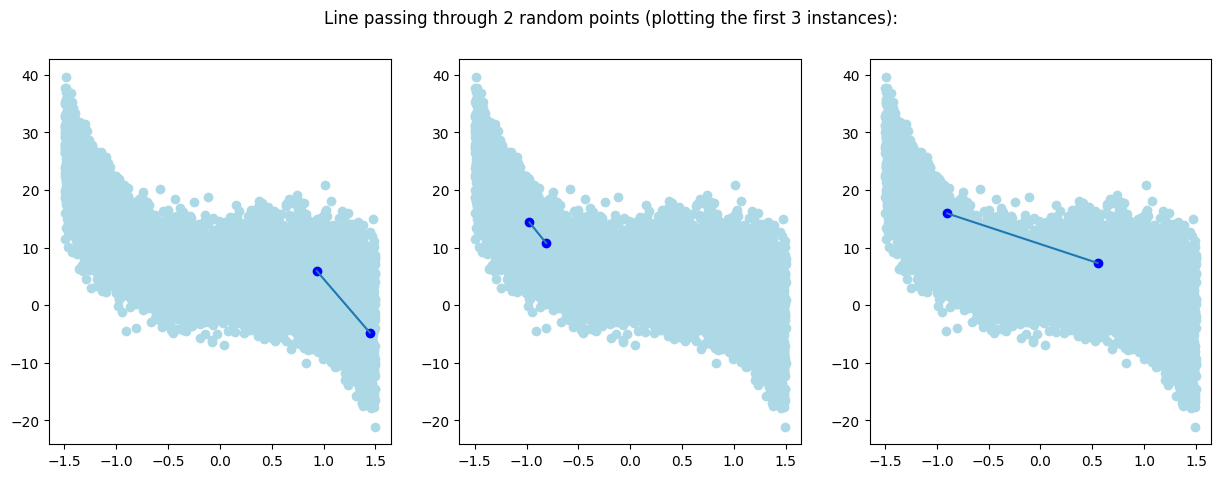

Best model weights for 1st y-coordinate: [-5.33038161 -1.63525341  5.89399523 -0.81239525  0.26410614]


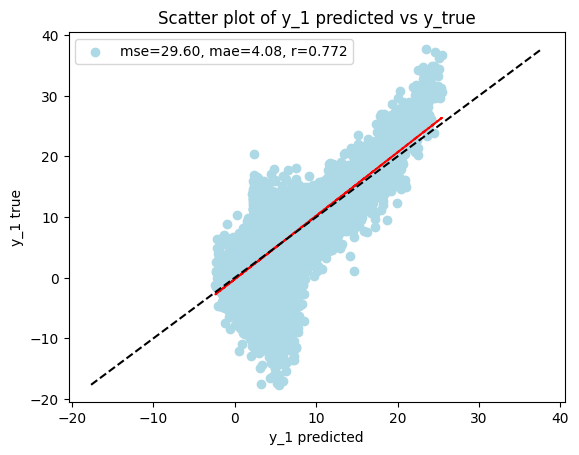

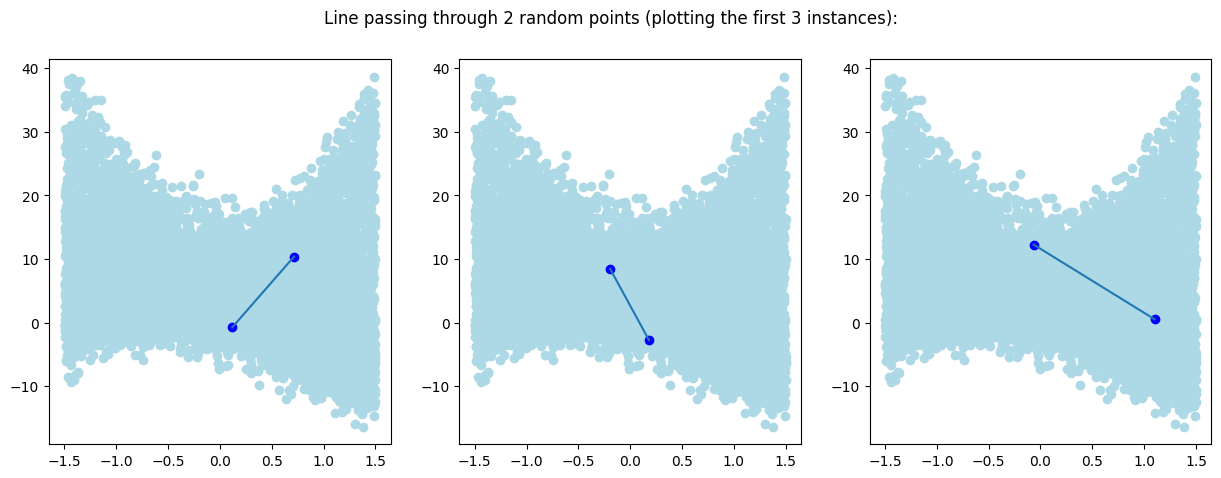

Best model weights for 2nd y-coordinate: [1.92935001 3.87569336 4.6256828  4.26637506 5.27654012]


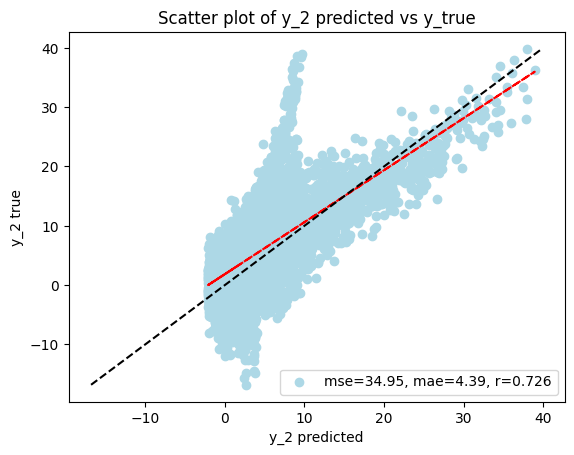

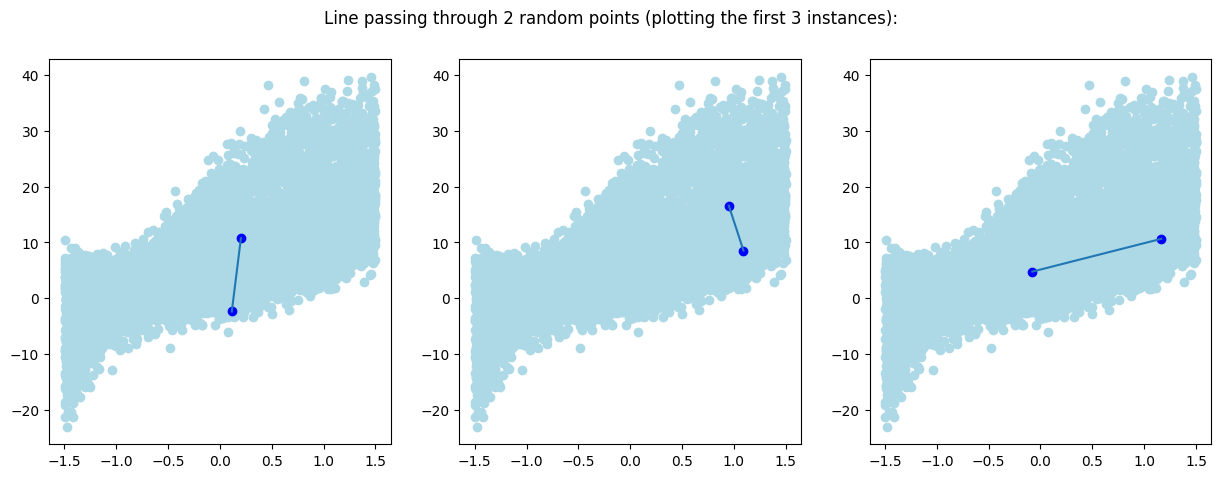

Best model weights for 3rd y-coordinate: [ 2.36459128 -4.89067541  2.08345412  6.57331737 -3.91125614]


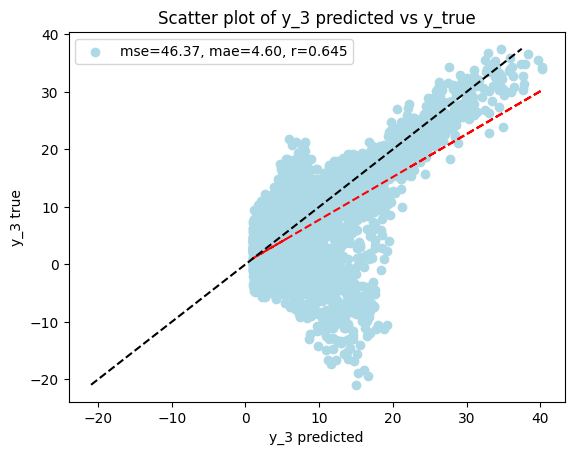

In [11]:
def line_equation(X, sampled_X, sampled_y):
    return sampled_y[0] + (X - sampled_X[0]) * (sampled_y[1] - sampled_y[0]) / (sampled_X[1] - sampled_X[0])
        
def distance_point_to_line(x0, y0, sampled_X, sampled_y):
    x1, x2 = sampled_X[0], sampled_X[1]
    y1, y2 = sampled_y[0], sampled_y[1]
    
    numerator = abs(np.dot((x2 - x1),(y1 - y0)) - np.dot((x1 - x0),(y2 - y1)))
    denominator = np.sqrt(np.sum((x1 - x2)**2) + np.sum((y1 - y2)**2))
    
    distance = numerator / denominator
    
    return distance



def ransac(X_train, y_train, n, k, t, d):

    best_model = None
    best_inliers = []

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Line passing through 2 random points (plotting the first 3 instances):')
    for _ in range(k):
        # Randomly select n data points to form a hypothetical model
        indices = np.random.choice(len(X_train), n, replace=False)
        sampled_X = X_train[indices]
        sampled_y = y_train[indices]

        # plot the model to the sampled data with npoints selected
        if _ < 3:
            axs[_].scatter(X_train[:,0],y_train, color='lightblue')
            axs[_].scatter(sampled_X[:,0], sampled_y, color='Blue')
            axs[_].plot(sampled_X[:,0], sampled_y)
            

        # Determine inliers (data points that fit the model well)
        y_train_new = y_train
        distances = np.array([distance_point_to_line(X_train[index], y_train_new[index], sampled_X, sampled_y) for index in range(X_train.shape[0])])
        distances = np.sum(distances, axis=1)
        inliers_idx = np.where(distances <= t)
        inliers_idx1 = np.array(inliers_idx).reshape(-1,1)

        inliers = np.array(distances[inliers_idx])
        inliers = inliers.reshape(-1,1)
        
        
        if len(inliers) >= d:
            all_inliers_X = X_train[inliers_idx]
            all_inliers_y = y_train_new[inliers_idx]
            
            weights, bias = fit(all_inliers_X, all_inliers_y)

            # Keep track of the model with the most inliers
            if len(inliers) > len(best_inliers):
                best_model = weights
                best_model_bias = bias
                best_inliers = inliers
                
    plt.show()
    return best_model, best_model_bias


# Define RANSAC parameters
n = 2      # Minimum number of data points required to fit the model
k = 50     # Maximum number of iterations
t = 1     # Threshold value for determining inliers
d = 200      # Number of close data points required to assert that a model fits well to data

mse_ransac = []
mae_ransac = []
r_ransac = []
# Apply RANSAC
for i in range(y_train.shape[1]):
    best_model, best_model_bias = ransac(X_train, y_train[:,i], n, k, t, d)

    idx = ['st','nd','rd']
    print("Best model weights for %s%s y-coordinate: %s" % (i+1, idx[i], best_model))

    y_pred = predict(X_test, best_model, best_model_bias)

    m_se = mse(y_test[:, i], y_pred)
    mse_ransac.append(m_se)

    m_ae = mae(y_test[:, i], y_pred)
    mae_ransac.append(m_ae)

    p_coeff = prearson_corr(y_test[:, i], y_pred)
    r_ransac.append(p_coeff)

    plt.scatter(y_pred, y_test[:,i], color='lightblue', label=f'mse={mse_ransac[i]:.2f}, mae={mae_ransac[i]:.2f}, r={r_ransac[i]:.3f}')
    plt.legend()
    coeff = np.polyfit(y_pred, y_test[:,i], 1)
    best_fit_line = np.polyval(coeff, y_pred)
    plt.plot(y_pred, best_fit_line, 'r--')
    plt.plot([min(y_test[:, i]), max(y_test[:, i])], [min(y_test[:, i]), max(y_test[:, i])], 'k--')
    plt.xlabel(f'y_{i+1} predicted')
    plt.ylabel(f'y_{i+1} true')
    plt.title(f'Scatter plot of y_{i+1} predicted vs y_true')



plt.show()

